<a href="https://colab.research.google.com/github/crisnandrarm/Regression-Task/blob/main/Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression (Case Study: Pie Sales)**

## **Case Description**

Diberikan sebuah dataset penjualan kue pie selama 15 minggu. Terdapat beberapa variabel dalam data tersebut yang nantinya akan dievaluasi variabel apa saja yang dapat mempengaruhi penjualan kue pie dan bagaimana pengaruh variabel tersebut pada penjualan kue pir. Berikut adalah variabel-variabel yang terdapat pada dataset tersebut.

* **week**: Minggu ke-n penjualan kue pie
* **pie_sales**: Total kue pie yang terjual pada minggu ke-n
* **price**: Harga setiap kue pie yang terjual (dalam $)
* **advertising**: Biaya yang dikeluarkan untuk mengingklankan kue pie pada minggu ke-n



### **Import Library**



In [ ]:
#Library for dataset
import pandas as pd
import numpy as np

#Library for data exploration
from termcolor import colored, cprint
import seaborn as sns

#Library for visualitation
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#Library for Multiple Linear Regression
import statsmodels.api as sm
from sklearn import linear_model

#Library for Model Evaluation
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

### **Exploratory Data Analysis**

#### **Import data**

In [ ]:
data_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv',  index_col='week',sep =";")
data_pie

,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


In [ ]:
X = data_pie[['price', 'advertising']]
Y = data_pie['pie_sales']

Tabel diatas merupakan data penjualan kue pie dari minggu ke 1 hingga ke 15. Dari deskripsi kasus yang dijabarkan diatas, variabel `pie_sales` merupakan dependent variable. Sedangkan variabel `price` dan `advertising` merupkan independent variabel dimana hubungan kedua variabel ini dengan variabel `pie_sales` akan dievaluasi.



#### **Data Distribution**

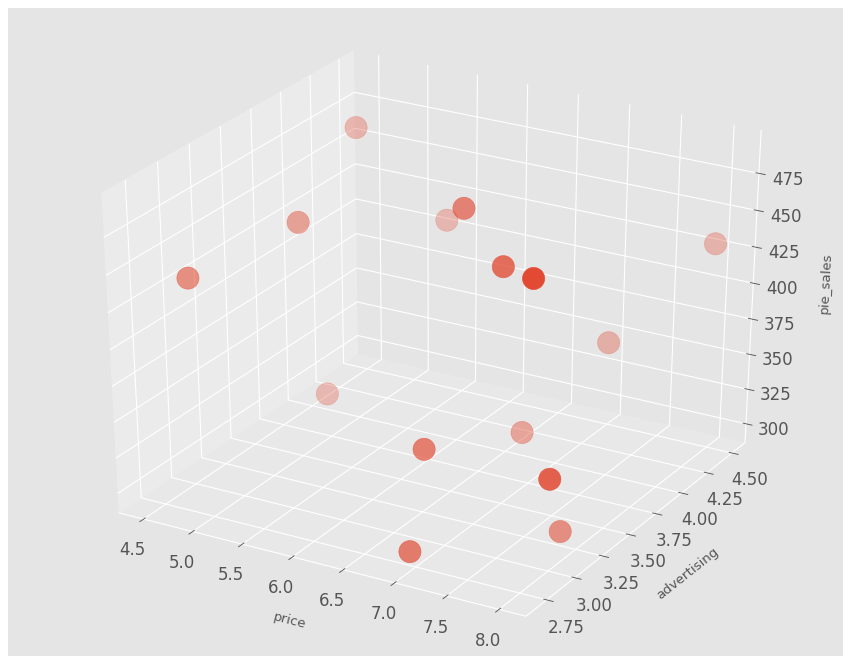

In [ ]:
fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(data_pie['price'], 
             data_pie['advertising'], 
             data_pie['pie_sales'],s=400);
ax.set_xlabel('price',size=12,labelpad=20)
ax.set_ylabel('advertising',size=12,labelpad=20)
ax.set_zlabel('pie_sales',size=12,labelpad=20)
ax.tick_params(axis='both', labelsize=15,pad =8)

plt.show()

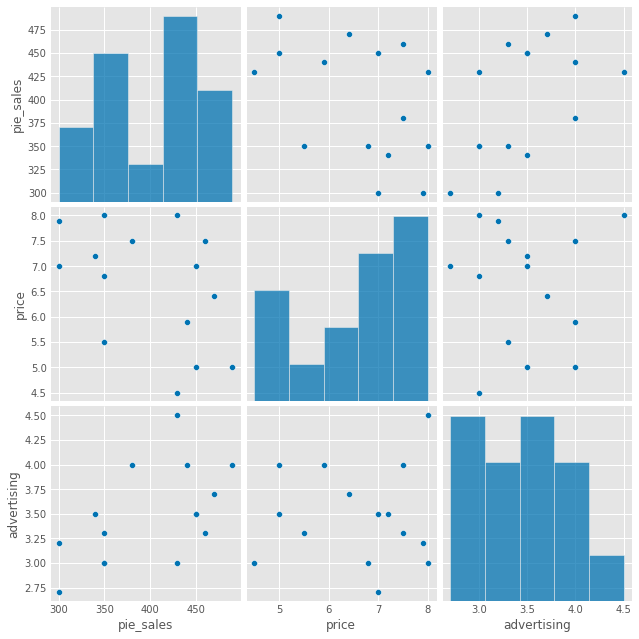

In [ ]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=data_pie, height=3)

#### **Attribute Correlation**

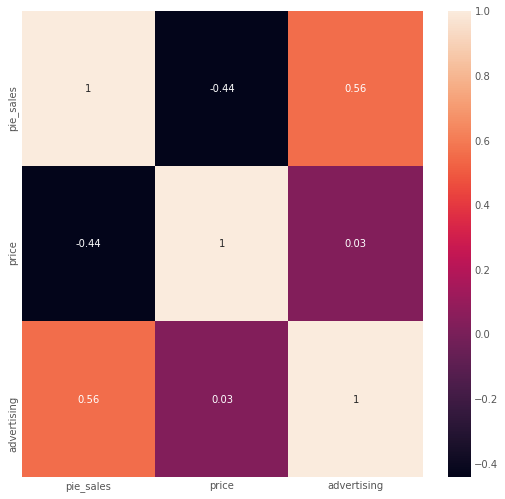

In [ ]:
# heatmap columns correlation
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(data_pie.corr(), annot=True )

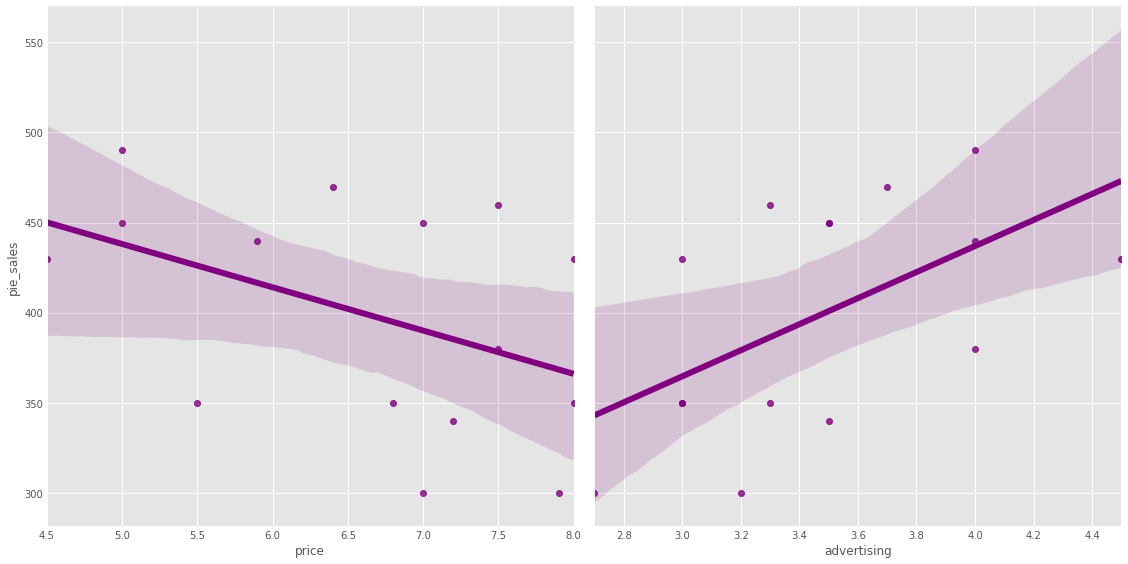

In [ ]:
# Visualize the data using scatterplot

g = sns.PairGrid(data_pie, y_vars=["pie_sales"],x_vars=["price", "advertising"], height=8)
g.map(sns.regplot, color='purple')

Berdasarkan heatmap dan scatterplot diatas, kita dapat melihat keterkaitan/hubungan antar variabel sebagai berikut:

*   variabel `pie_sales` memiliki nilai korelasi atau hubungan yang negatif dengan variabel `price`
*   variabel `pie_sales` memiliki nilai korelasi atau hubungan yang positif dengan variabel `advertising`
*   Kedua variabel yang saling bebas yaitu variabel `price` dan `advertising` memiiliki koefisien korelasi mendekati 0 yang artinya kedua variabel bebas ini tidak saling memengaruhi dan tidak ada multikolinieritas dalam variabel yang hendak digunakan.



### **Modelling Multiple Linear Regression using Sklearn**

##### **Train Model**

In [ ]:
regr = linear_model.LinearRegression()
model_1 = regr.fit(X, Y)
model_1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept: \n', round(model_1.intercept_,4))
print('Coefficients Price Variable: \n', round(model_1.coef_[0],4))
print('Coefficients Advertising Variable: \n', round(model_1.coef_[1],4))

Intercept: 
 306.5262
Coefficients Price Variable: 
 -24.9751
Coefficients Advertising Variable: 
 74.131


##### **Visualisasi Model**

In [ ]:
x_surface, y_surface = np.meshgrid(np.linspace(data_pie.price.min(), data_pie.price.max(), 30),
                             np.linspace(data_pie.advertising.min(), data_pie.advertising.max(),30))

# Predict using model built on previous step
predicted = model_1.predict(pd.DataFrame({'price': x_surface.ravel(), 'advertising': y_surface.ravel()}))

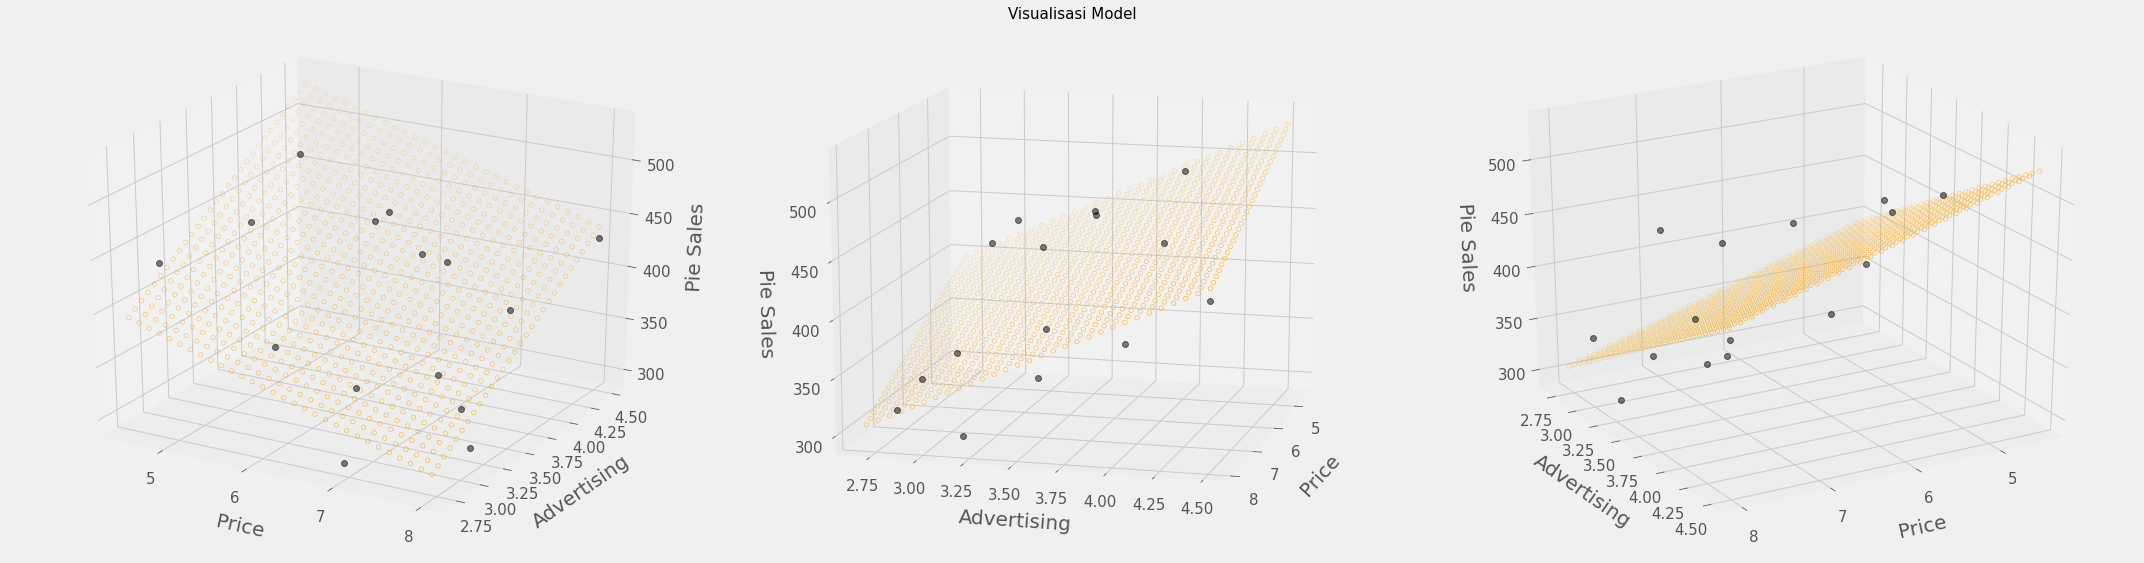

In [ ]:
# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(30,8))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(data_pie['price'], data_pie['advertising'], data_pie['pie_sales'], color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x_surface.flatten(), y_surface.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='orange')
    ax.set_xlabel('Price', size=20,labelpad=20)
    ax.set_ylabel('Advertising', size=20,labelpad=20)
    ax.set_zlabel('Pie Sales', size=20,labelpad=20)
    ax.tick_params(axis='both', labelsize=15,pad =8)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Visualisasi Model', fontsize=15, color='k')

fig.tight_layout()

##### **Model Evaluation**

Nilai aktual dan nilai prediksi akan dibandingkan untuk menghitung keakuratan model regresi. Metrik evaluasi menjadi kunci dalam pengembangan model, karena memberikan wawasan tentang area yang memerlukan perkembangan.

Terdapat beberapa metrik evaluasi yang berbeda, berikut adalah beberapa metrik evaluasi untuk menghitung keakuratan model berdasarkan data set pengujian:

* **R-squared** menunjukkan seberapa dekat data dengan model regresi (fungsi) yang terbentuk. Semakin tinggi R-squared, semakin baik model tersebut sesuai dengan data Anda. Semakin mendekati nilai 1.0 maka model semakin baik.
* **Mean absolute error (MAE)** adalah nilai rata-rata mutlak dari selisih antara nilai aktual dan nilai prediksi. Ini adalah metrik yang paling mudah dipahami karena pada dasarnya nilai ini memiliki makna kesalahan rata-rata.
* **Mean Squared Error (MSE)** adalah rata-rata dari nilai kuadrat error. Ini lebih sering diapakai daripada Mean absolute error karena fokusnya lebih diarahkan ke error besar. Hal ini disebabkan kuadrat meningkatkan kesalahan yang lebih besar secara eksponensial dibandingkan dengan yang lebih kecil.
* **Root Mean Squared Error (RMSE)** adalah tingkat kesalahan menurut akar kuadrat MSE


In [ ]:
def regression_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('R-Square: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
regression_results(Y,model_1.predict(X))

R-Square:  0.5215
MAE:  34.5457
MSE:  1802.2204
RMSE:  42.4526


##### **Pie Sales Value Prediction**

In [ ]:
#@title Input Variable Value
price = 4 #@param {type:"number"}
advertising =  3.3#@param {type:"number"}
ind_var = {
    'price' : price,
    'advertising' : advertising
   }
new_x_mod1 = pd.DataFrame(data=ind_var, columns=X.columns, index=[0])
new_y_mod1 = model_1.predict(new_x_mod1)
new_x_mod1['pie sales'] = new_y_mod1
display(new_x_mod1)
print("Prediksi penjualan kue pie = ",new_x_mod1['pie sales'][0])


,price,advertising,pie sales
0,4,3.3,451.257995


Prediksi penjualan kue pie =  451.257994925281


### **Modelling Multiple Linear Regression using Statsmodel**

##### **Train Model**

In [ ]:
X_const = sm.add_constant(X) # adding a constant

In [ ]:
model_2 = sm.OLS(Y, X_const).fit()
predictions = model_2.predict(X_const) 
model_2

##### **Model Summary & Evaluation**


In [ ]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        16:25:26   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

In [ ]:
regression_results(Y,model_2.predict(X_const))

R-Square:  0.5215
MAE:  34.5457
MSE:  1802.2204
RMSE:  42.4526


##### **Pie Sales Value Prediction**

In [ ]:
#@title Input Variable Value
price =  10#@param {type:"number"}
advertising =  9#@param {type:"number"}
ind_var = {
    'const':1.0,
    'price' : price,
    'advertising' : advertising
   }
new_x_mod2 = pd.DataFrame(data=ind_var, columns=X_const.columns, index=[0])
new_y_mod2 = model_2.predict(new_x_mod2)
new_x_mod2['pie sales'] = new_y_mod2
display(new_x_mod2)
print("Prediksi penjualan kue pie = ",new_x_mod2['pie sales'][0])


,const,price,advertising,pie sales
0,1.0,10,9,723.953916


Prediksi penjualan kue pie =  723.9539155041427


### **Analisis Model**

#### **Model Equation**

Dari dua model yang dihasilkan, didapatkan nilai Intercept ($\beta_0$), Coefficients for Price ($\beta_1$), dan Coefficients for Advertisement ($\beta_2$) sehingga menghasilkan fungsi regresi (model) sebagai berikut:

$$ y =\beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + \beta_3 * x_3 + \varepsilon $$

$$  y = 306.5262 -24.9751x_1 + 74.131x_2 + \varepsilon $$





#### **R-Square**



Dari hasil evaluasi kedua model diatas, diperoleh nilai **R-square** sebesar **0.521** yang artinya variabel price dan advertising dapat memprediksi variabel pie_sales sebesar 52%